# pipdb
### A simple API for interacting with Precipitation Imaging Package (PIP) microphysical observations

Welcome to the tutorial notebook!

In this Python notebook, we walk through the basics of using the API to interact with our PIP dataset (accessible here: https://doi.org/10.7302/37yx-9q53). 

The API is fairly straightforward, but allows users to easily:
1. Load PIP data from NetCDF into xarray (single day, full year, multi-year)
1. Plot site locations
1. Extract individual variables of interest
1. Print general statistics for each of the included dataset variables
1. Curve fit PSD parameters
1. Plot PSD variables of interest (1D and 2D)
1. Plot mean PSD variables over time
1. Separate dataset into rain and snow
1. Compare between original and adjusted L4-derived products
1. And more!

Additional processing and QA scripts are provided in our adjacent code repository (https://github.com/frasertheking/pip_processing), and more detailed information can be found in the associated manuscript article for this dataset alongside the wiki.

Also, all images here are saved to the '../images/' folder.

We begin by importing the pipdb library. Note that you will need a Conda Environment (see https://www.anaconda.com/) set up for the required dependencies. 

This can be installed and loaded using the below commands:
- conda env create -f pipdb.yml
- conda activate pipdb

In [4]:
import numpy as np
import pipdb

# Note: you'll want to change your MAIN_PATH in pipdb.pconfig to point to the downloaded PIP dataset


Next, we define some global variables to select some data to look at (for example, a snowy December day at Marquette in 2018).

For a full list of sites to look at, check pipdb.pconfig.ALL_SITES

In [5]:
site = 'MQT'
year, month, day = '2018', '12', '02'

Call the *get_precip_data_for_day* function with the above site information to load the PIP NetCDF dataset into memory (i.e., into a single xarray dataset).

In [6]:
ds = pipdb.get_precip_data_for_day(f"{pipdb.pconfig.MAIN_PATH}{year}_{site}/netCDF/", site, year, month, day)
ds

<xarray.Dataset> Size: 5MB
Dimensions:                                  (time: 1440,
                                              edensity_distributions_bin_centers: 131,
                                              edensity_distributions_bin_edges: 131,
                                              particle_size_distributions_bin_centers: 131,
                                              particle_size_distributions_bin_edges: 131,
                                              velocity_distributions_bin_centers: 131,
                                              velocity_distributions_bin_edges: 131)
Coordinates:
  * time                                     (time) datetime64[ns] 12kB 2018-...
  * edensity_distributions_bin_centers       (edensity_distributions_bin_centers) float64 1kB ...
  * edensity_distributions_bin_edges         (edensity_distributions_bin_edges) float64 1kB ...
  * particle_size_distributions_bin_centers  (particle_size_distributions_bin_centers) float64 1kB ...
  * particle_size_distributions_bin_edges    (particle_size_distributions_bin_edges) float64 1kB ...
  * velocity_distributions_bin_centers       (velocity_distributions_bin_centers) float64 1kB ...
  * velocity_distributions_bin_edges         (velocity_distributions_bin_edges) float64 1kB ...
Data variables:
    edensity_lwe_rate_rr                     (time) float64 12kB ...
    edensity_lwe_rate_nrr                    (time) float64 12kB ...
    edensity_lwe_rate_ed                     (time) float64 12kB ...
    lat                                      float64 8B 46.53
    lon                                      float64 8B -87.55
    ed_adj                                   (time) float64 12kB ...
    nrr_adj                                  (time) float64 12kB ...
    rr_adj                                   (time) float64 12kB ...
    edensity_distributions_rho               (time, edensity_distributions_bin_centers) float64 2MB ...
    particle_size_distributions_psd          (time, particle_size_distributions_bin_centers) float64 2MB ...
    velocity_distributions_vvd               (time, velocity_distributions_bin_centers) float64 2MB ...

With the data now loaded into an *xarray.Dataset* object, we can interact with it as we would any other xarray dataset. For instance, we can extract values into numpy arrays, load things into pandas if needed, or whatever other format you'd like to use. As an example, we print the dataset time variable below for the day we just loaded in (1440 minute timestamps [UTC] spanning the entire day).

In [7]:
ds.time

<xarray.DataArray 'time' (time: 1440)> Size: 12kB
array(['2018-12-02T00:00:00.000000000', '2018-12-02T00:01:00.000000000',
       '2018-12-02T00:02:00.000000000', ..., '2018-12-02T23:57:00.000000000',
       '2018-12-02T23:58:00.000000000', '2018-12-02T23:59:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 12kB 2018-12-02 ... 2018-12-02T23:59:00
Attributes:
    long_name:  time

We also include a basic dataset description function to provide a high-level overview of the data structure for the 1D variables.

In [8]:
pipdb.describe_dataset(ds)


Dataset statistics:
Site position: (46.5318, -87.5483)

edensity_lwe_rate_rr:
    Mean = 2.48868778280543e-06, Standard Deviation = 6.545920476851711e-05
    25th Percentile = 0.0, Median = 0.0, 75th Percentile = 0.0
    Non-NaN Count = 1326, Unique Values = 3
    Sum = 0.0033, Data Type = float64
    Memory Usage = 11520 bytes

edensity_lwe_rate_nrr:
    Mean = 1.9908624434389142, Standard Deviation = 1.4508984737477124
    25th Percentile = 0.8432, Median = 1.7946, 75th Percentile = 2.99135
    Non-NaN Count = 1326, Unique Values = 1289
    Sum = 2639.8836, Data Type = float64
    Memory Usage = 11520 bytes

edensity_lwe_rate_ed:
    Mean = 0.1833235294117647, Standard Deviation = 0.06858041379850388
    25th Percentile = 0.136, Median = 0.17, 75th Percentile = 0.211
    Non-NaN Count = 1326, Unique Values = 276
    Sum = 243.087, Data Type = float64
    Memory Usage = 11520 bytes

ed_adj:
    Mean = 0.183090219863533, Standard Deviation = 0.06852136053088827
    25th Percentile = 0.

Or, if you want to calculate your own means, you can do that too using standard xarray accessors:

In [9]:
print(np.nanmean(ds.edensity_lwe_rate_rr))
print(np.nanmean(ds.edensity_lwe_rate_nrr))
print(np.nanmean(ds.edensity_lwe_rate_ed))

2.48868778280543e-06
1.9908624434389142
0.1833235294117647


You can also easily plot the site you loaded using Cartopy with the *plot_site* function (we load the coordinates directly from the dataset).

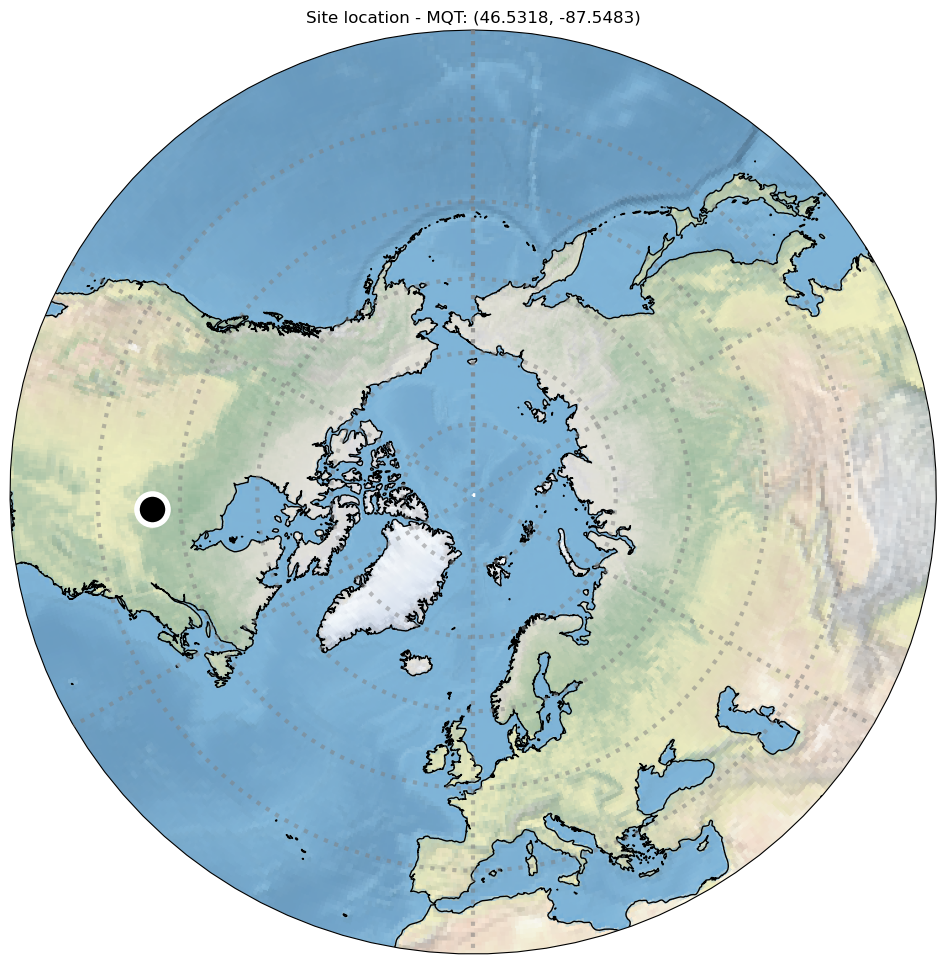

In [10]:
pipdb.plot_site(site, ds)

If you are interested in calculating particle size distributions (PSDs) for a given dataset, you can pass it into the *get_psd_params* function where an inverse exponential function is fit to the data, and the resulting intercept (N0), slope (lambda) and total particle count are automatically returned to you as a dictionary.

If you are interested in experimenting with different PSD fits, consider extending this methodology (e.g., for a gamma function).

In [11]:
params = pipdb.get_psd_params(ds)
print(params)

{'N0': 4951.997115489068, 'lambda': 1.0296796199910865, 'count': 28057777}


You can then plot these fitted PSD parameters using our *plot_inverse_exponential* function: 

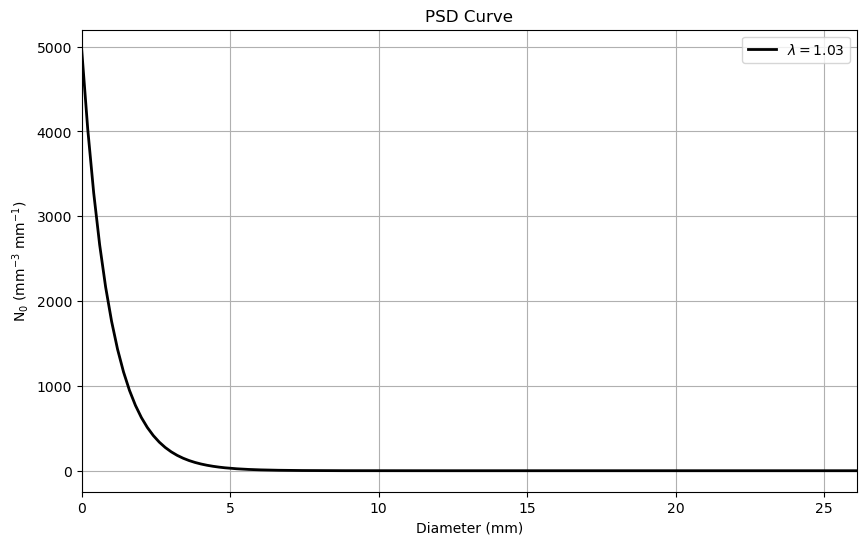

In [12]:
pipdb.plot_inverse_exponential(params['N0'], params['lambda'])

To view the full day's PSD, density distribution (rho) and fall speed distributions (VVD) along with the corresponding 1D level 4 data from the PIP, you can simply call our *plot_precip_data_for_day* function, pass in the dataset, site name and datetime information.

These plots are particularily useful for identifying phase-transitions and specific storm types based on the observed microphysical distributions.

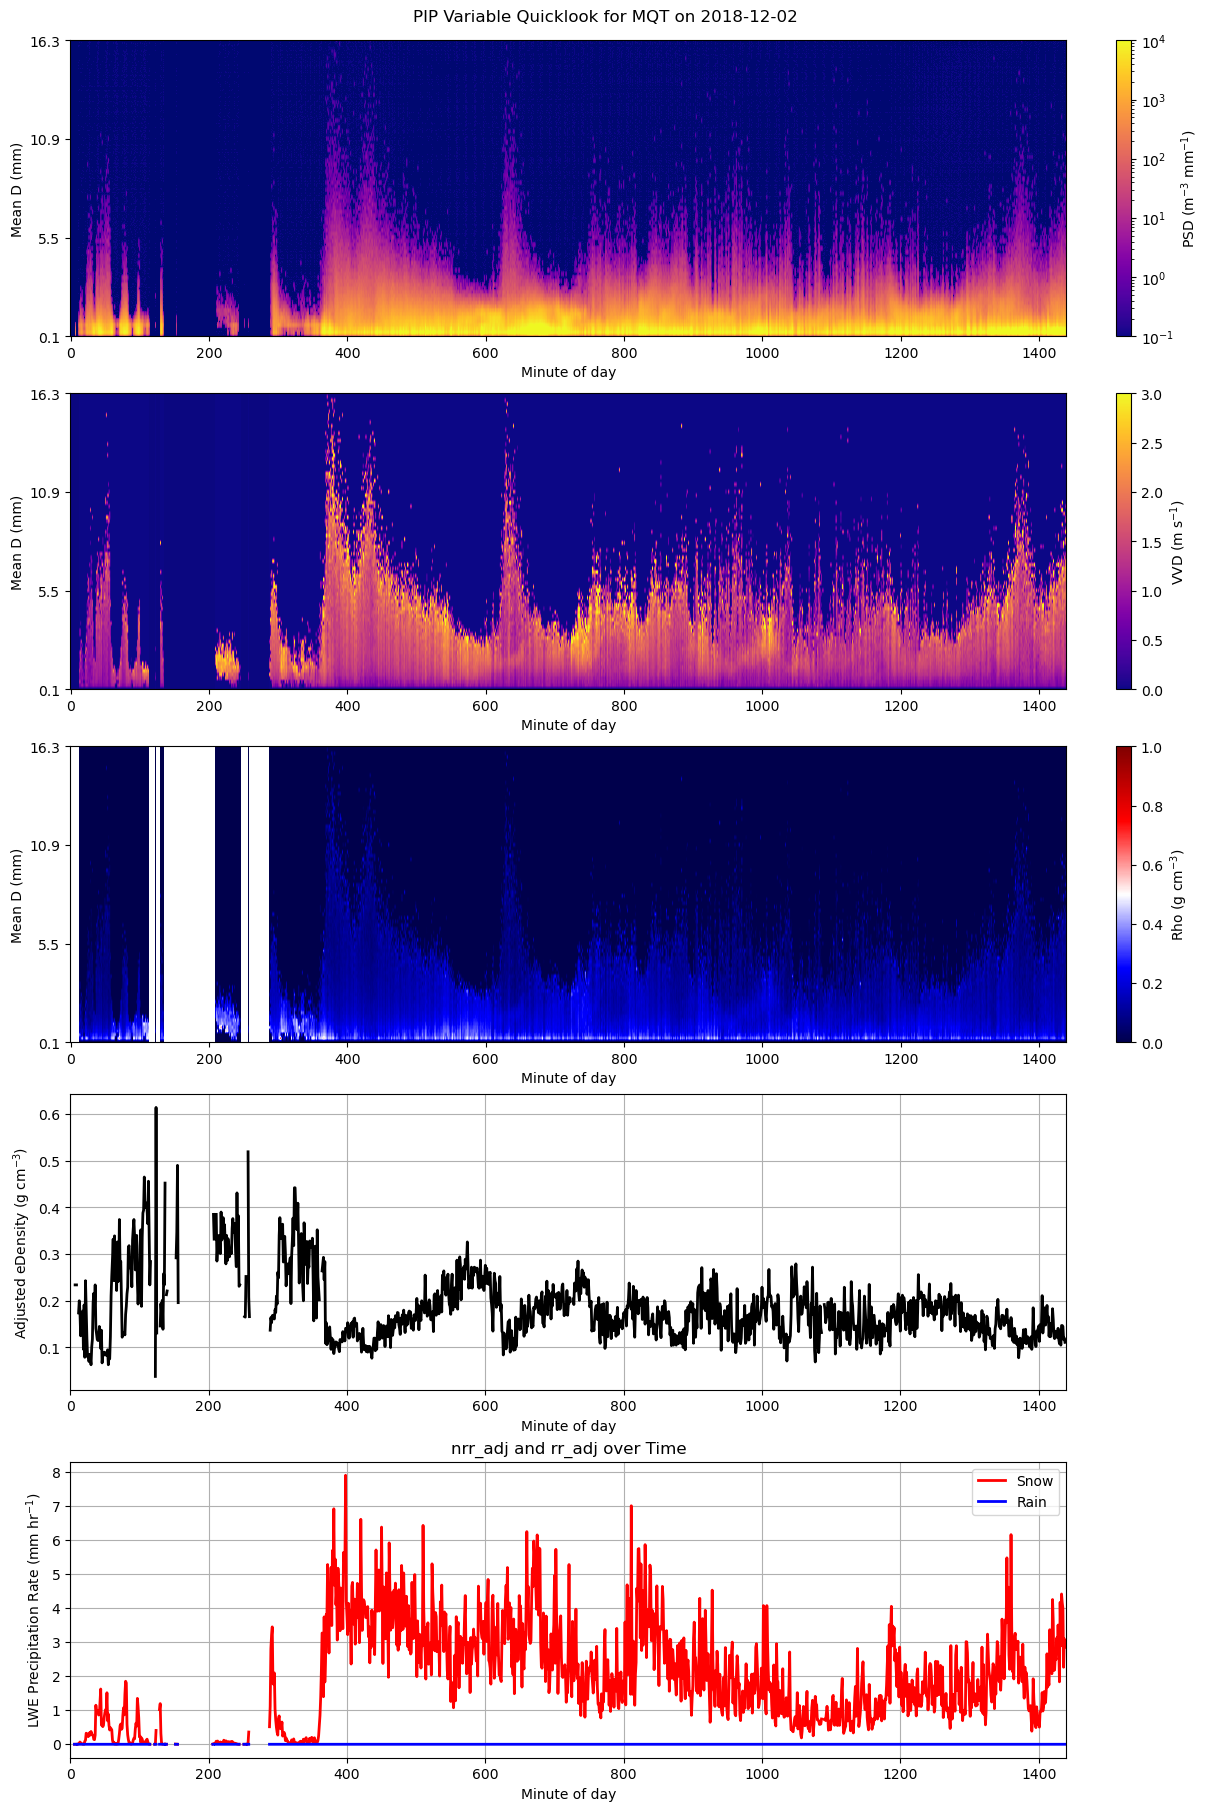

In [13]:
pipdb.plot_precip_data_for_day(ds, site, year, month, day)

For additional summary statistics on the 2D variables, you can call *plot_distribution_means_with_confidence_intervals* with your dataset, which plots the mean Rho, PSD and VVD values per particle bin, and their corresponding 95% confidence intervals.

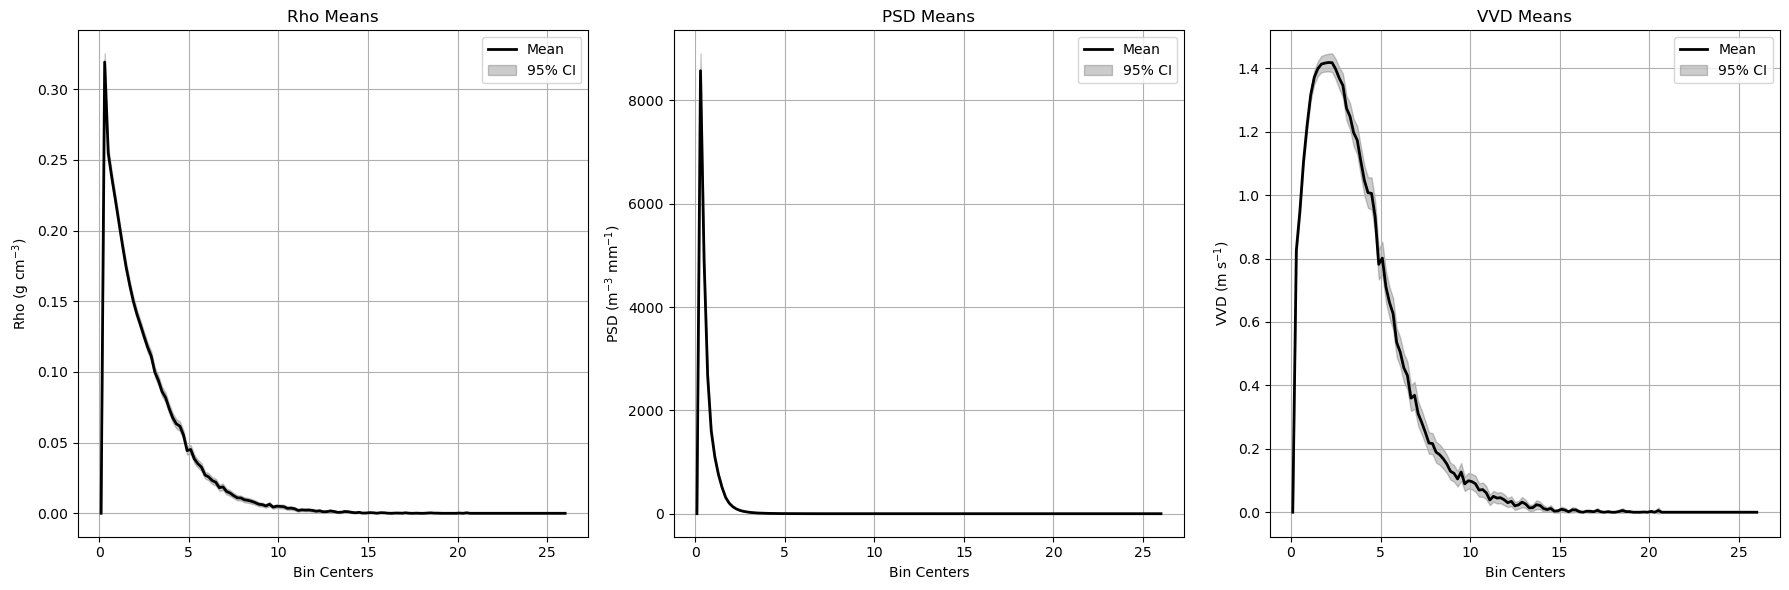

In [14]:
pipdb.plot_distribution_means_with_confidence_intervals(ds)


If you'd like to quickly view the difference between the adjusted and original level 4 PIP product values (i.e., the 1D variables in the dataset), you cann call *compare_adjusted_values*, which will plot the original and adjusted effective density values (plotted against the mean L3 effective density distribution values), and the differences in the adjusted rainfall and snowfall rate products.

Note that for many days, these variables will be identical as the timing fix only impacts days with gaps in the data (this is where the timing offset originates). For additional details, please see the manuscript and pip_processing GitHub repository.

/Users/fraserking/miniforge3/envs/pipdb/lib/python3.12/site-packages/pipdb-0.0.1-py3.12.egg/pipdb/pplot.py:185: RuntimeWarning: Mean of empty slice


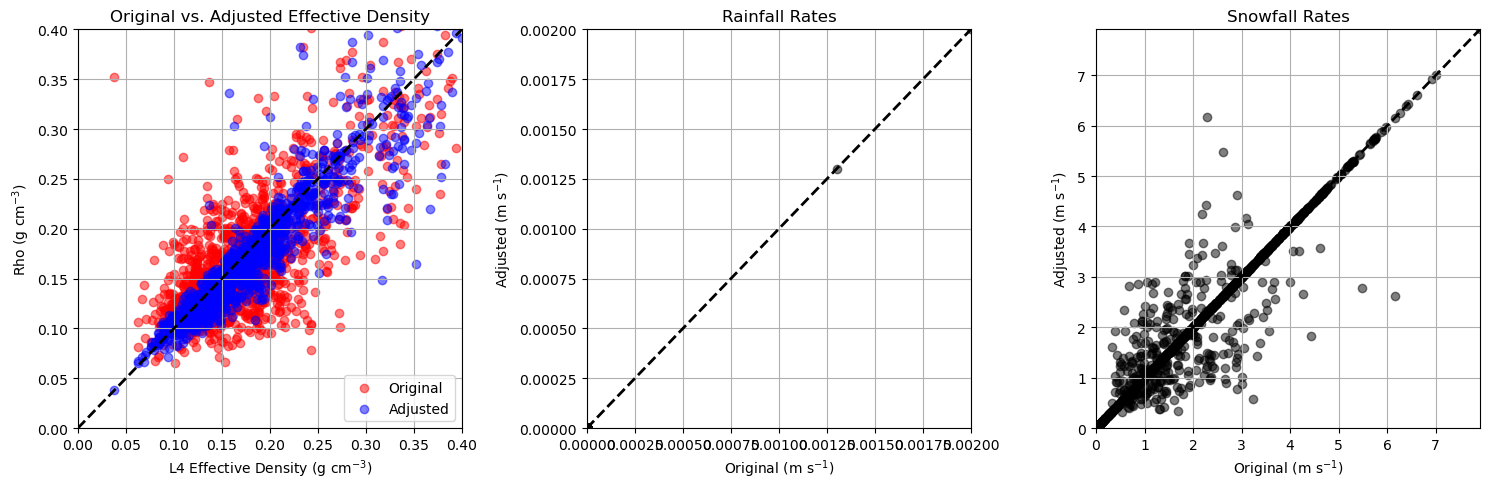

In [15]:
pipdb.compare_adjusted_values(ds)

To separate the dataset into only rain or only snow, you can use the supplied *split_dataset_by_ed_adj* function, which uses a simply effective density threshold to perform the phase-partition.

In [16]:
phase_split_ds = pipdb.split_dataset_by_ed_adj(ds)
snowfall_subset_ds = phase_split_ds[0]
rainfall_subset_ds = phase_split_ds[1]

print("Snowfall ds:")
print(snowfall_subset_ds)

print("\nRainfall ds:")
print(rainfall_subset_ds)


Snowfall ds:
<xarray.Dataset> Size: 4MB
Dimensions:                                  (time: 1307,
                                              edensity_distributions_bin_centers: 131,
                                              edensity_distributions_bin_edges: 131,
                                              particle_size_distributions_bin_centers: 131,
                                              particle_size_distributions_bin_edges: 131,
                                              velocity_distributions_bin_centers: 131,
                                              velocity_distributions_bin_edges: 131)
Coordinates:
  * time                                     (time) datetime64[ns] 10kB 2018-...
  * edensity_distributions_bin_centers       (edensity_distributions_bin_centers) float64 1kB ...
  * edensity_distributions_bin_edges         (edensity_distributions_bin_edges) float64 1kB ...
  * particle_size_distributions_bin_centers  (particle_size_distributions_bin_centers) f

We also include a function to load more than a single day of data into memory at a time called *load_single_year_data*, which loads an entire year into an xarray.Dataset object. Note that depending on the location/year, this could be a fair bit of data and may take up to a minute to run.

In [17]:
year_to_examine = '2016'

yearly_data = pipdb.load_single_year_data(f"{pipdb.pconfig.MAIN_PATH}{year_to_examine}_{site}/netCDF/", site, year_to_examine)
print(yearly_data)

<xarray.Dataset> Size: 1GB
Dimensions:                                  (time: 393120,
                                              edensity_distributions_bin_centers: 131,
                                              edensity_distributions_bin_edges: 131,
                                              particle_size_distributions_bin_centers: 131,
                                              particle_size_distributions_bin_edges: 131,
                                              velocity_distributions_bin_centers: 131,
                                              velocity_distributions_bin_edges: 131)
Coordinates:
  * time                                     (time) datetime64[ns] 3MB 2016-1...
  * edensity_distributions_bin_centers       (edensity_distributions_bin_centers) float64 1kB ...
  * edensity_distributions_bin_edges         (edensity_distributions_bin_edges) float64 1kB ...
  * particle_size_distributions_bin_centers  (particle_size_distributions_bin_centers) float64 1kB 

Once loaded, you can use many of the above functions to extract general statistics from the dataset:

Dataset statistics:
Site position: ([46.5318 46.5318 46.5318 ... 46.5318 46.5318 46.5318], [-87.5483 -87.5483 -87.5483 ... -87.5483 -87.5483 -87.5483])

edensity_lwe_rate_rr:
    Mean = 0.3546321066695851, Standard Deviation = 2.287847389608715
    25th Percentile = 0.0, Median = 0.0, 75th Percentile = 0.0045
    Non-NaN Count = 109647, Unique Values = 13023
    Sum = 38884.3466, Data Type = float64
    Memory Usage = 3144960 bytes

edensity_lwe_rate_nrr:
    Mean = 0.19475937417348407, Standard Deviation = 0.5878241247840489
    25th Percentile = 0.0004, Median = 0.0096, 75th Percentile = 0.11015
    Non-NaN Count = 109647, Unique Values = 13180
    Sum = 21354.781100000007, Data Type = float64
    Memory Usage = 3144960 bytes

edensity_lwe_rate_ed:
    Mean = 0.1603882732769707, Standard Deviation = 0.29784968950940977
    25th Percentile = 0.042, Median = 0.099, 75th Percentile = 0.162
    Non-NaN Count = 109647, Unique Values = 1018
    Sum = 17586.093000000004, Data Type = float64

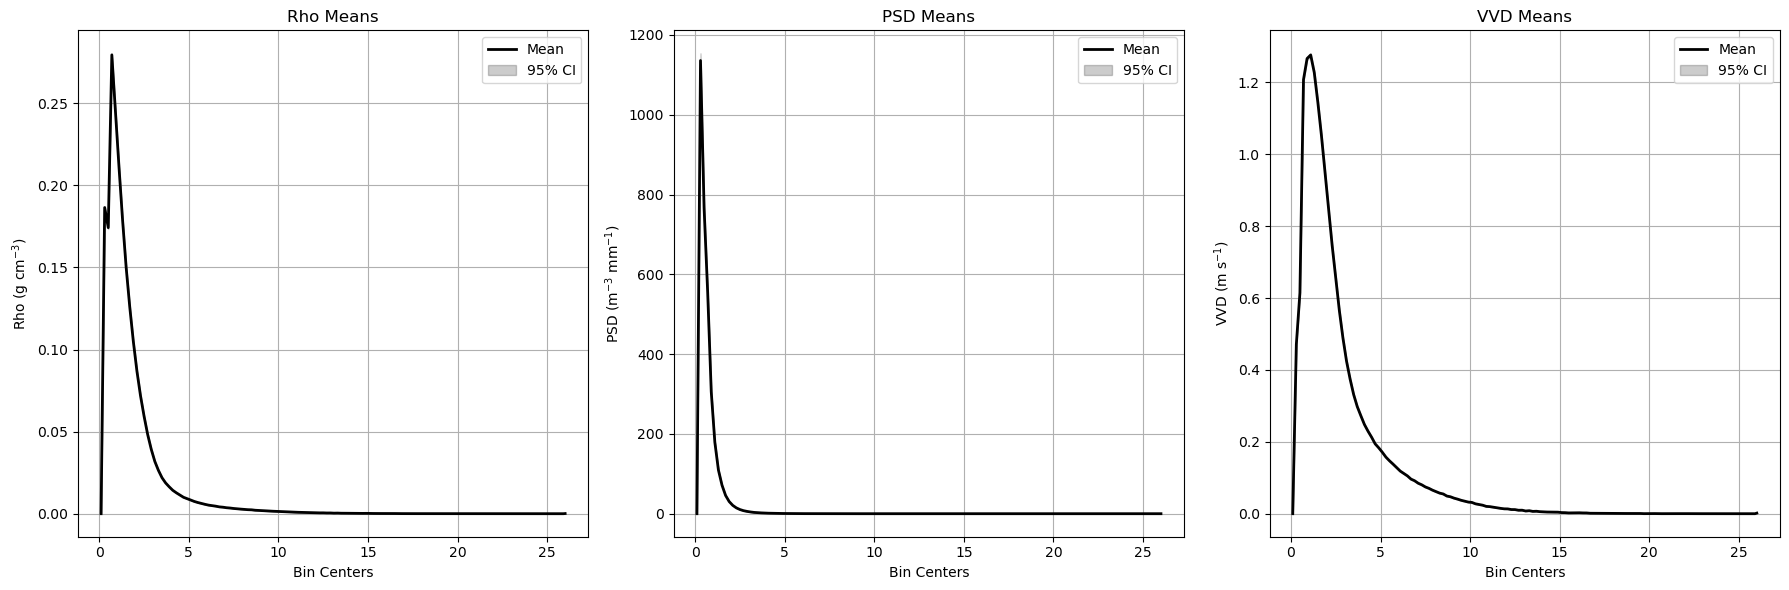

In [18]:
pipdb.describe_dataset(yearly_data)
pipdb.plot_distribution_means_with_confidence_intervals(yearly_data)

Finally, you can load as many sites as you want (you can load in the entire dataset at once for instance), using the *load_data_for_sites* function and passing a list of site names to load. Note that currently, this function loads all years for said site. If you are loading the entire dataset into memory, you may want to apply some data chunking features (e.g., Dask) to speed things up, as it currently takes around 10 minutes.

This function returns a dict of YEAR_SITE xarray.Dataset objects, which can be interacted with using the same functions shown above.

In [19]:
# multi_site_dict = load_data_for_sites(pconfig.ALL_SITES)
multi_site_dict = pipdb.load_data_for_sites(pipdb.pconfig.MAIN_PATH, ['KIS', 'IMP'])
print(multi_site_dict)

Loading: IMP 2021
Loading: IMP 2022
Loading: IMP 2023
Loading: KIS 2018
Loading: KIS 2017
{'2021_IMP': <xarray.Dataset> Size: 171MB
Dimensions:                                  (time: 53280,
                                              edensity_distributions_bin_centers: 131,
                                              edensity_distributions_bin_edges: 131,
                                              particle_size_distributions_bin_centers: 131,
                                              particle_size_distributions_bin_edges: 131,
                                              velocity_distributions_bin_centers: 131,
                                              velocity_distributions_bin_edges: 131)
Coordinates:
  * time                                     (time) datetime64[ns] 426kB 2021...
  * edensity_distributions_bin_centers       (edensity_distributions_bin_centers) float64 1kB ...
  * edensity_distributions_bin_edges         (edensity_distributions_bin_edges) float64 1kB

You can also plot multiple sites using the *plot_sites* function:

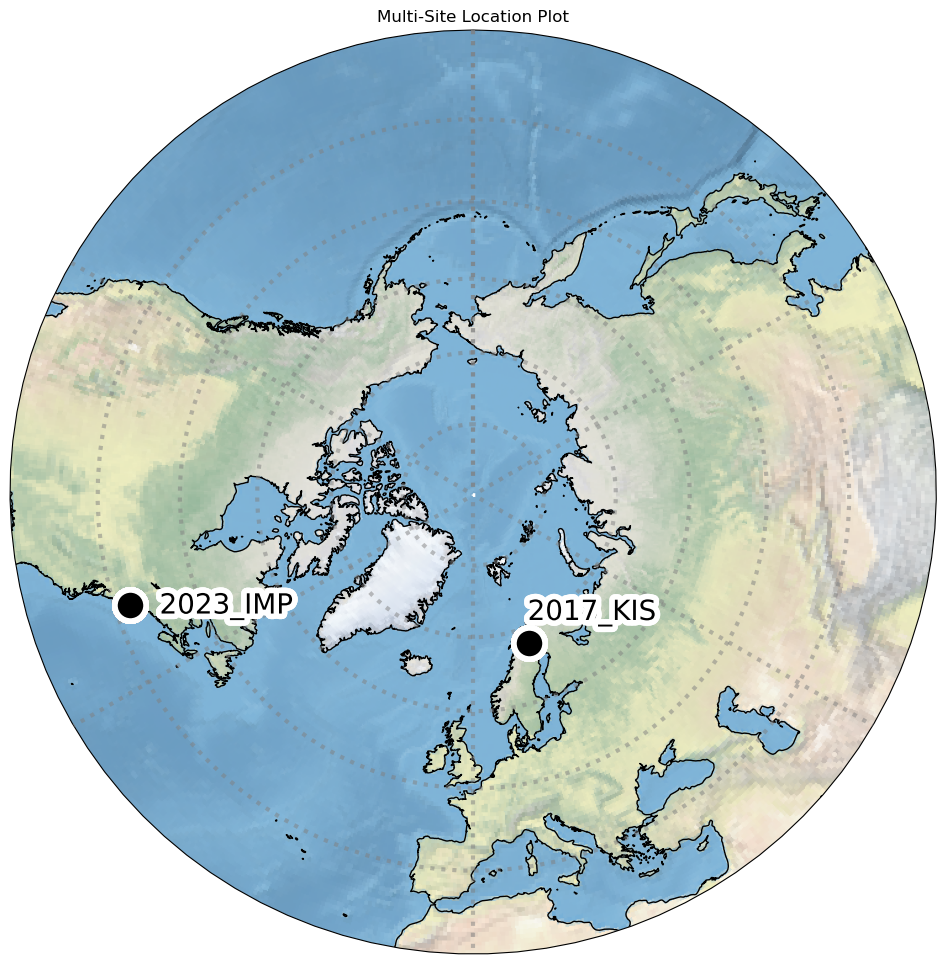

In [20]:
pipdb.plot_sites(multi_site_dict)

And that's all!

Note that while we provide all of these simply helper functions for interacting with the data. The PIP files themselves are stored as accessible, CF-compliant NetCDFs that can easily be interfaced with using a variety of other software packages (e.g., CDO, NCL). The purpose of this guide is to demonstrate how to easily load this data into Python for additional processing.

If you have any questions, please reach out to the corresponding author.

Thanks!